In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import pyplot as plt
from math import floor
import math

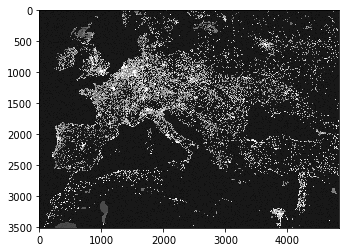

In [2]:
input_filename="/homes/r18qu/Bureau/L/S2/elu510/moi/challenge_3/population-density-map.bmp"
im = Image.open(input_filename)
plt.imshow(im)

In [6]:
img_p = np.array(im)
#find rise and brest;x is row,y is column
mask = np.all(img_p == (0, 255, 0), axis=-1)
locationPixelBrest = np.transpose(np.where(mask))
print("Coordinates (y,x) of the green pixel (Rize): ", locationPixelBrest)
mask = np.all(img_p == (255, 0, 0), axis=-1)
locationPixelRize = np.transpose(np.where(mask))
print("Coordinates (y,x) of the red pixel (Brest): ", locationPixelRize)

Coordinates (y,x) of the green pixel (Rize):  [[2108 4426]]
Coordinates (y,x) of the red pixel (Brest):  [[1306  669]]


In [7]:
width=im.size[0]
heigth=im.size[1]
colors = im.getcolors(width*heigth)

print('Width: %s' % width)
print('Height: %s' % heigth)

Width: 4830
Height: 3510


In [8]:
import pandas as pd
data = pd.read_csv('/homes/r18qu/Bureau/L/S2/elu510/moi/challenge_3/Population_original_each_cell.csv')
#population=data.values
datas=np.array(data) #读出来会多一列，因此需要删掉第一列，或者是从第二列开始读
original_population = datas[:,1:]

In [9]:
population_zombie=np.zeros((234, 322))

#should add the initial zombie amount (the population in rise)

In [10]:
population_humain=original_population


In [ ]:
#elevation=

In [19]:
#we will create a dict which has the information of Original_population,elevation,population_zombie,population_humain
all_information_in_each_cell={}
i=0
j=0
print("the length of row is :",len(original_population))
print("the length of column is :",len(original_population[0]))

for i in range(len(original_population)):
    for j in range(len(original_population[i])):
        Original_population=original_population[i][j]
        Population_zombie=population_zombie[i][j]
        Population_humain=population_humain[i][j]
        key=(i,j)
        all_information_in_each_cell[key]=[Original_population,Population_zombie,Population_humain]

        
#print(all_information_in_each_cell[(0,0)].)  #print 



the length of row is : 234
the length of column is : 322


In [20]:
def surrounds(point):
    """
    This function is to find the information of the 
    """
    surround={}
    x=point[0]   
    y=point[1] 
    temporay=[[x-1,y-1],[x-1,y],[x-1,y+1],[x,y-1],[x,y+1],[x+1,y-1],[x+1,y],[x+1,y+1]]
    for i in range(len(temporay)):
        t=temporay[i]
        a=t[0]
        b=t[1]
        n=all_information_in_each_cell[(a,b)]        
        surround[(a,b)]=n
    return surround
#input should be a certain position of point p[x][y]=>p(x,y)

In [17]:
surrounds([5,5])

NameError: name 'all_information_in_each_cell' is not defined

In [ ]:
def the_total_humain_amount_of_surround(point):
    """
    This function calculates the total population of all neighbors
    """
    # The number of humain population in the neigbors
    
    neighbors=surrounds(point)
    print(neighbors)
    H = 0
    for i in neighbors.keys():
        information_of_neighbor = neighbors[i]
        humain_amonut_of_neighbor = information_of_neighbor[2]
        H= humain_amonut_of_neighbor + H
    
    return H


In [ ]:
the_total_humain_amount_of_surround()

In [ ]:
def zombie_evoluation():
    """
    This function descrires a zombie moving process. And also descrire how they evoluate
    That's a process of killing people and inverse
    """

    # Step 1: Zombies spread
    for n in nodes_a_evaluer:
        H = 0
        H = population_neighbor_cell_calcul(n,G,popu_dict)
        Auxlist.add(n)
        if H > 0:
            total = 0
            for neighbor in g.neighbors(n):
                # the angle valid for zombie move is [-20,20]. -20 for a zombie go down and inverse
                if -20 <= degree_dict[n][neighbor] <= 20:
                    Auxlist.add(neighbor)

                    zombie_entree = (popu_dict[neighbor][0]/H)*zombie_anciene[n][0]*(1 - (abs(degree_dict[n][neighbor])/20))
                    zombie_dict[neighbor][0] = zombie_dict[neighbor][0] + zombie_entree

                    total += zombie_entree

                    draw.text(zombie_dict[neighbor][1],"+",fill="blue",font=font)
                    draw2.text(zombie_dict[neighbor][1],"+",fill="blue",font=font)
            zombie_dict[n][0] = zombie_dict[n][0] - total

    # Step 2 Zombies kill people
    for neighbor in Auxlist:
        delta = popu_dict[neighbor][0] - 10*zombie_dict[neighbor][0]
        if delta <= 0:
            zombie_dict[neighbor][0] = zombie_dict[neighbor][0] + popu_dict[neighbor][0]
            popu_dict[neighbor][0] = 0
        else:
            popu_dict[neighbor][0] = delta
            zombie_dict[neighbor][0] = zombie_dict[neighbor][0] + 10*zombie_dict[neighbor][0]

    # Step3, humain kill zombie
    for neighbor in Auxlist:
        delta = zombie_dict[neighbor][0] - 10*popu_dict[neighbor][0]
        if delta <= 0:
             zombie_dict[neighbor][0] = 0
        else:
zombie_dict[neighbor][0] = delta